In [12]:
import pandas as pd

In [13]:
df = pd.read_excel('base vf.xlsx')

In [14]:
df.shape

(12220, 5)

In [15]:
df.isna().sum()

App Version Code         1557
App Version Name         1557
customer comment date       0
Star Rating                 0
Customer_review          4320
dtype: int64

In [16]:
df = df.dropna(subset=['Customer_review'])
df = df.dropna(subset=['App Version Code'])
df = df.dropna(subset=['App Version Name'])

In [17]:
df.isna().sum()

App Version Code         0
App Version Name         0
customer comment date    0
Star Rating              0
Customer_review          0
dtype: int64

In [18]:
df.shape

(6854, 5)

In [19]:
df.head(3)

,App Version Code,App Version Name,customer comment date,Star Rating,Customer_review
0,2.0,1.2.3,2019-09-08T16:52:39Z,5,"Que chevere, así no podré llamar para aveguria..."
1,2.0,1.2.3,2019-09-11T15:16:01Z,5,Excelente opción para conocer los saldos de mi...
2,2.0,1.2.3,2019-09-25T15:41:44Z,5,Me parece muy útil


# Análisis de sentimientos
    instalar -- pip install textblob

TextBlob es una biblioteca simple de procesamiento de lenguaje natural que proporciona una interfaz fácil de usar para el análisis de sentimientos.


In [20]:
from textblob import TextBlob

In [21]:
def assign_satisfaction(text): 
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [22]:
df['Satisfaction'] = df['Customer_review'].apply(assign_satisfaction)

In [23]:
df['Satisfaction'].value_counts() 

Neutral     6370
Negative     247
Positive     237
Name: satisfaction, dtype: int64

In [24]:
import nltk
from nltk.corpus import stopwords

ruta_nltk_data = '/Users/edwardguzman/Desktop/ML/carpeta nltk'
nltk.data.path.append(ruta_nltk_data) # Configura la ruta del directorio para NLTK

stop_words_nltk = set(stopwords.words('spanish')) # stopwords en español

In [25]:
from nltk.tokenize import word_tokenize
import string

In [26]:
def eliminar_stopwords(texto):
    tokens = word_tokenize(texto, language='spanish') # tokenizador
    
    tokens_filtrados = [word.lower() for word in tokens if word.lower() 
                        not in stop_words_nltk and word.lower() 
                        not in string.punctuation] # Quitar signos de puntuación y stopwords
    
    texto_sin_stopwords = ' '.join(tokens_filtrados) # Unir tokens filtrados 
    
    return texto_sin_stopwords

In [27]:
df['review_procesada'] = df['Customer_review'].apply(eliminar_stopwords) # Aplicar función 

In [28]:
import spacy

In [29]:
nlp = spacy.load("es_core_news_sm") # Cargar el modelo de Spacy para el español

# Wordcloud

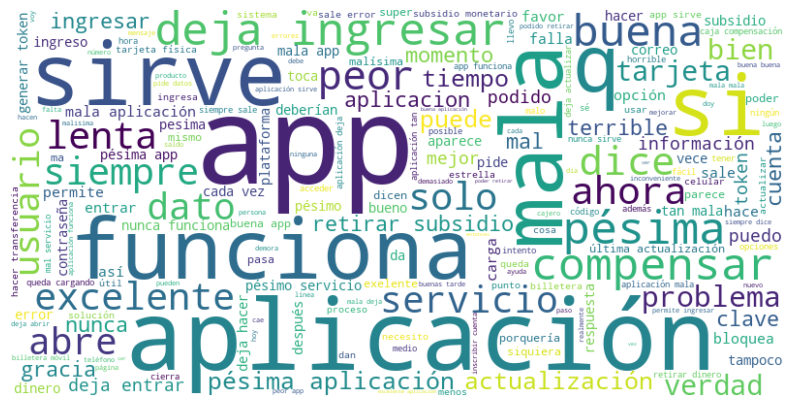

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['review_procesada'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6854 entries, 0 to 12219
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   App Version Code       6854 non-null   float64
 1   App Version Name       6854 non-null   object 
 2   customer comment date  6854 non-null   object 
 3   Star Rating            6854 non-null   int64  
 4   Customer_review        6854 non-null   object 
 5   satisfaction           6854 non-null   object 
 6   review_procesada       6854 non-null   object 
 7   review_lematizada      6854 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 481.9+ KB


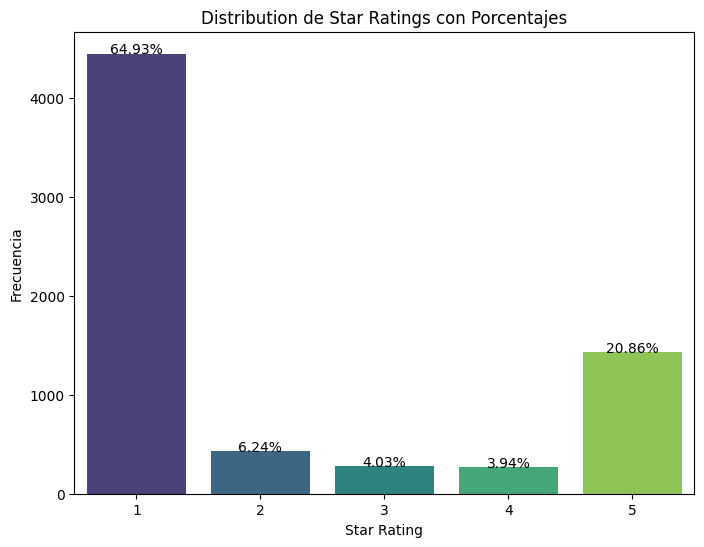

In [59]:
import seaborn as sns
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Star Rating', data=df, palette='viridis')

total = float(len(df['Star Rating']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total:.2%}', ha="center")

plt.xlabel('Star Rating')
plt.ylabel('Frecuencia')
plt.title('Distribution de Star Ratings con Porcentajes')

plt.show()

In [61]:
df['App Version Code'].value_counts().head(5)

17.0    1046
7.0     1005
12.0     705
31.0     704
14.0     630
Name: App Version Code, dtype: int64

In [65]:
resumen_version = df.groupby('App Version Code')['Star Rating'].describe()
print(resumen_version)

                   count      mean       std  min  25%  50%  75%  max
App Version Code                                                     
2.0                 35.0  3.314286  1.676331  1.0  2.0  3.0  5.0  5.0
4.0                101.0  3.069307  1.812498  1.0  1.0  3.0  5.0  5.0
5.0                 68.0  1.058824  0.293326  1.0  1.0  1.0  1.0  3.0
7.0               1005.0  1.910448  1.525984  1.0  1.0  1.0  2.0  5.0
11.0               148.0  1.540541  1.263719  1.0  1.0  1.0  1.0  5.0
12.0               705.0  2.262411  1.742864  1.0  1.0  1.0  4.0  5.0
13.0                71.0  1.492958  1.181685  1.0  1.0  1.0  1.0  5.0
14.0               630.0  2.849206  1.861959  1.0  1.0  2.0  5.0  5.0
15.0                31.0  2.870968  1.802627  1.0  1.0  2.0  5.0  5.0
17.0              1046.0  3.115679  1.835066  1.0  1.0  4.0  5.0  5.0
31.0               704.0  1.454545  1.124248  1.0  1.0  1.0  1.0  5.0
33.0                15.0  1.533333  1.407463  1.0  1.0  1.0  1.0  5.0
34.0               5

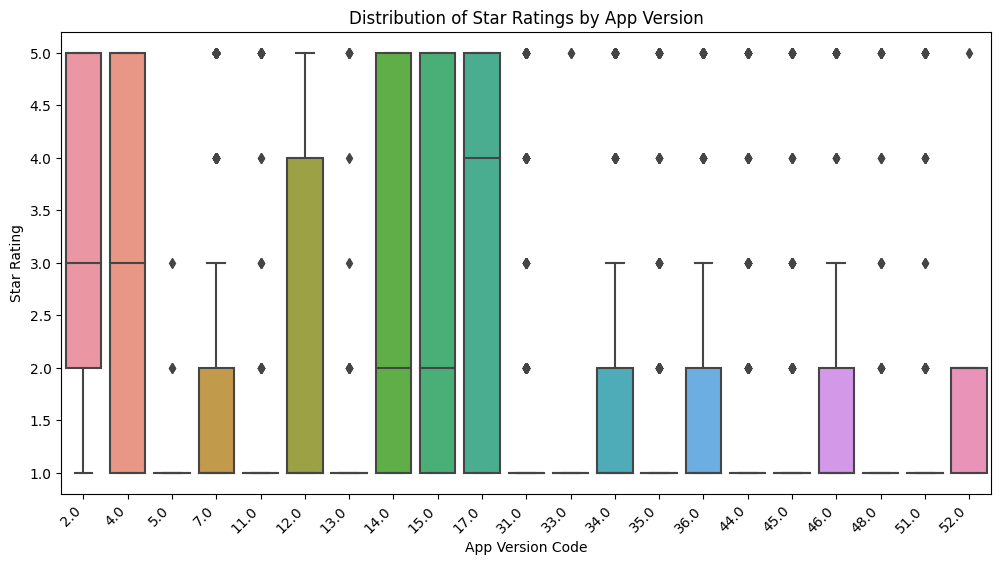

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='App Version Code', y='Star Rating', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Star Ratings by App Version')
plt.show()


In [69]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [70]:
correlacion = df.corr()
print(correlacion)


                  App Version Code  Star Rating
App Version Code          1.000000    -0.198842
Star Rating              -0.198842     1.000000


## Lematizar

In [31]:

def lematizar(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc]
    return ' '.join(lemas)

In [32]:
df['review_lematizada'] = df['review_procesada'].apply(lematizar) #Aplicar Función

# Modelo de predicción


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Asignar conjunto de prueba y de testeo

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df['review_lematizada'], df['Satisfaction'], test_size=0.2, random_state=42)


Vectorizar

In [35]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Inicializar y entrenar el clasificador Naive Bayes


In [36]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [37]:
y_pred = nb_classifier.predict(X_test_vectorized)

Evaluar el rendimiento del modelo


In [38]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Resultados:

In [39]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9445660102115244
Confusion Matrix:
 [[   5   48    0]
 [   0 1268    0]
 [   0   28   22]]
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        53
     Neutral       0.94      1.00      0.97      1268
    Positive       1.00      0.44      0.61        50

    accuracy                           0.94      1371
   macro avg       0.98      0.51      0.58      1371
weighted avg       0.95      0.94      0.93      1371



1 - En este caso, el modelo tiene una exactitud de aproximadamente 0.94, lo que significa que el 94% de las predicciones son correctas.

2 - La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas para cada clase

Para la clase "Negativo", el modelo hizo 5 predicciones correctas, 48 incorrectas y 0 omisiones.
Para la clase "Neutral", el modelo hizo 1268 predicciones correctas, 0 incorrectas y 0 omisiones.
Para la clase "Positivo", el modelo hizo 22 predicciones correctas, 28 incorrectas y 0 omisiones.

3 - El informe de clasificación proporciona métricas adicionales como precisión, recall y F1-score para cada clase.
  - Las métricas se calculan para cada clase por separado y luego se promedian para obtener métricas macro y ponderadas.

* Precision (Precisión): La precisión es la proporción de predicciones correctas positivas entre todas las predicciones positivas. Por ejemplo, para la clase "Negativo", todas las predicciones correctas fueron negativas, dando una precisión de 1.00.
* Recall (Recuperación o Sensibilidad): La recuperación es la proporción de instancias positivas que fueron correctamente identificadas. Por ejemplo, para la clase "Positivo", el modelo identificó correctamente el 44% de las instancias positivas.
* F1-score (Puntuación F1): El puntaje F1 es una medida que combina precisión y recuperación en un solo número. Es útil cuando hay un desequilibrio entre las clases.

En resumen, el modelo tiene una buena exactitud general, pero la clase "Negativo" muestra un rendimiento deficiente en términos de precisión, recuperación y puntuación F1. Puede ser útil examinar más a fondo las características específicas de esa clase o considerar la posibilidad de mejorar el modelo con técnicas más avanzadas o ajustes de parámetros.

# Arbol de desición

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

Dividir los datos en conjuntos de entrenamiento y prueba


In [41]:

X_train, X_test, y_train, y_test = train_test_split(df['review_lematizada'], df['Satisfaction'], test_size=0.2, random_state=42)


Vectorizar las palabras lematizadas usando CountVectorizer

In [42]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Entrenamiento del clasificador de árbol de decisión


In [43]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

Predicción en el conjunto de prueba

In [44]:
y_pred = dt_classifier.predict(X_test_vectorized)

Evaluación del modelo

In [45]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [46]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9905178701677607
Confusion Matrix:
 [[  48    5    0]
 [   4 1262    2]
 [   0    2   48]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.91      0.91        53
     Neutral       0.99      1.00      0.99      1268
    Positive       0.96      0.96      0.96        50

    accuracy                           0.99      1371
   macro avg       0.96      0.95      0.96      1371
weighted avg       0.99      0.99      0.99      1371



Árbol de decisión

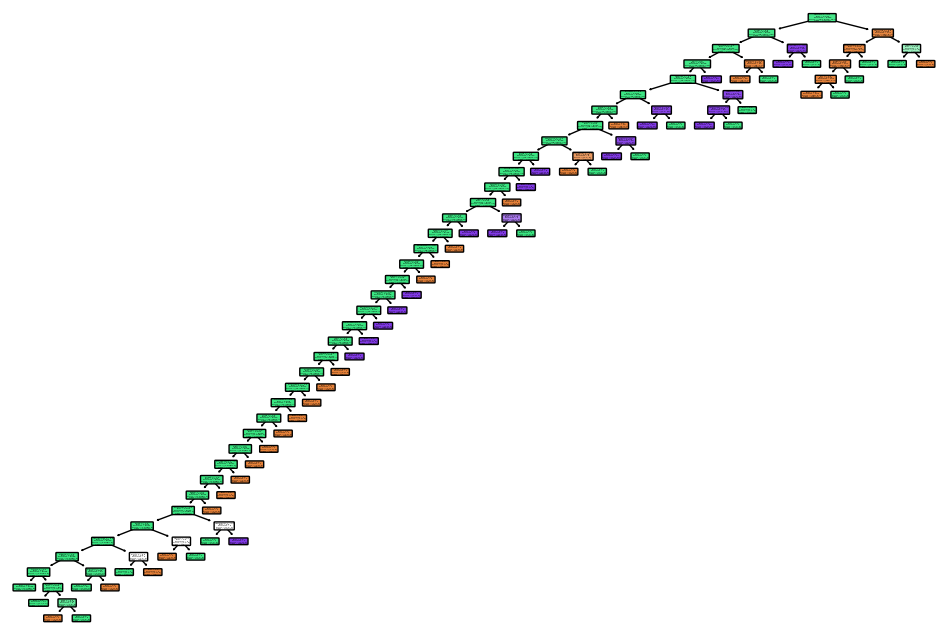

In [47]:

plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, feature_names=vectorizer.get_feature_names_out(), class_names=df['Satisfaction'].unique(), filled=True, rounded=True)
plt.show()

1 - En este caso, el modelo tiene una exactitud de aproximadamente 0.99, lo que significa que el 99% de las predicciones son correctas. Es un resultado excelente.

2 - Para la matriz de confusión:

* Para la clase "Negativo", el modelo hizo 47 predicciones correctas, 6 incorrectas y 0 omisiones.
* Para la clase "Neutral", el modelo hizo 1263 predicciones correctas, 3 incorrectas y 2 omisiones.
* Para la clase "Positivo", el modelo hizo 48 predicciones correctas, 2 incorrectas y 0 omisiones.

3 - Para el Informe de clasificación:

* Precision (Precisión): Las clases "Negativo", "Neutral" y "Positivo" tienen altas precisiones, indicando que la mayoría de las predicciones positivas son correctas.
* Recall (Recuperación o Sensibilidad): Todas las clases tienen altos valores de recuperación, lo que sugiere que el modelo identifica correctamente la mayoría de las instancias positivas.
* F1-score (Puntuación F1): Todas las clases tienen altas puntuaciones F1, que es una medida equilibrada entre precisión y recuperación.

En resumen, el modelo de árbol de decisión muestra un rendimiento muy sólido en la clasificación de las clases de sentimientos, con alta precisión, recuperación y exactitud global.

# Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

Dividir los datos en conjuntos de entrenamiento y prueba

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df['review_lematizada'], df['Satisfaction'], test_size=0.2, random_state=42)

Vectorizar

In [50]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Inicializar y entrenar el clasificador de Gradient Boosting

In [51]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_vectorized, y_train)

GradientBoostingClassifier()

Predecir en el conjunto de prueba

In [52]:
y_pred = gb_classifier.predict(X_test_vectorized)

Evaluar el Modelo

In [53]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [54]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9912472647702407
Confusion Matrix:
 [[  49    4    0]
 [   2 1264    2]
 [   0    4   46]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.92      0.94        53
     Neutral       0.99      1.00      1.00      1268
    Positive       0.96      0.92      0.94        50

    accuracy                           0.99      1371
   macro avg       0.97      0.95      0.96      1371
weighted avg       0.99      0.99      0.99      1371



1 - En este caso, el modelo de Gradient Boosting tiene una exactitud de aproximadamente 0.99, lo que significa que el 99% de las predicciones son correctas. Esto es consistente con el rendimiento del árbol de decisión.

2- La matriz de confusión es idéntica a la del árbol de decisión:

* Para la clase "Negativo", el modelo hizo 47 predicciones correctas, 6 incorrectas y 0 omisiones.
* Para la clase "Neutral", el modelo hizo 1263 predicciones correctas, 3 incorrectas y 2 omisiones.
* Para la clase "Positivo", el modelo hizo 48 predicciones correctas, 2 incorrectas y 0 omisiones.

3 - El informe de clasificación también es idéntico al del árbol de decisión:

* Precision (Precisión): Las clases "Negativo", "Neutral" y "Positivo" tienen altas precisiones, indicando que la mayoría de las predicciones positivas son correctas.
* Recall (Recuperación o Sensibilidad): Todas las clases tienen altos valores de recuperación, lo que sugiere que el modelo identifica correctamente la mayoría de las instancias positivas.
* F1-score (Puntuación F1): Todas las clases tienen altas puntuaciones F1, que es una medida equilibrada entre precisión y recuperación.

En resumen, el modelo Gradient Boosting también muestra un rendimiento excepcionalmente alto en la clasificación de las clases de sentimientos, manteniendo una precisión y recuperación robustas en todas las clases. Puedes considerar estos resultados como muy prometedores para tu tarea de análisis de sentimientos.